In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [7]:
matplotlib.rc('font', **font)

In [8]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

In [9]:
files = ["../data/clean_expected.csv", "../data/clean_last_round.csv", "../data/clean_two_opponents.csv",
         "../data/clean_sixteen_states_two_rounds.csv", "../data/clean_sixteen_states_two_rounds_opponents.csv"]

In [10]:
heatmaps = []
extents = []

for file in files:
    df = pd.read_csv(file)
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [11]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [61]:
min_ = 1
max_ = 1391629.0

In [62]:
titles = ["Perfect Memory Payoffs",
          "Limited Memory Payoffs" "\n" "(last round with one other player)",
          "Limited Memory Payoffs" "\n" "(last round with two other players)",
          "Limited Memory Payoffs" "\n" "(last two rounds with one other player)",
          "Limited Memory Payoffs" "\n" "(last two rounds with two other players)"]

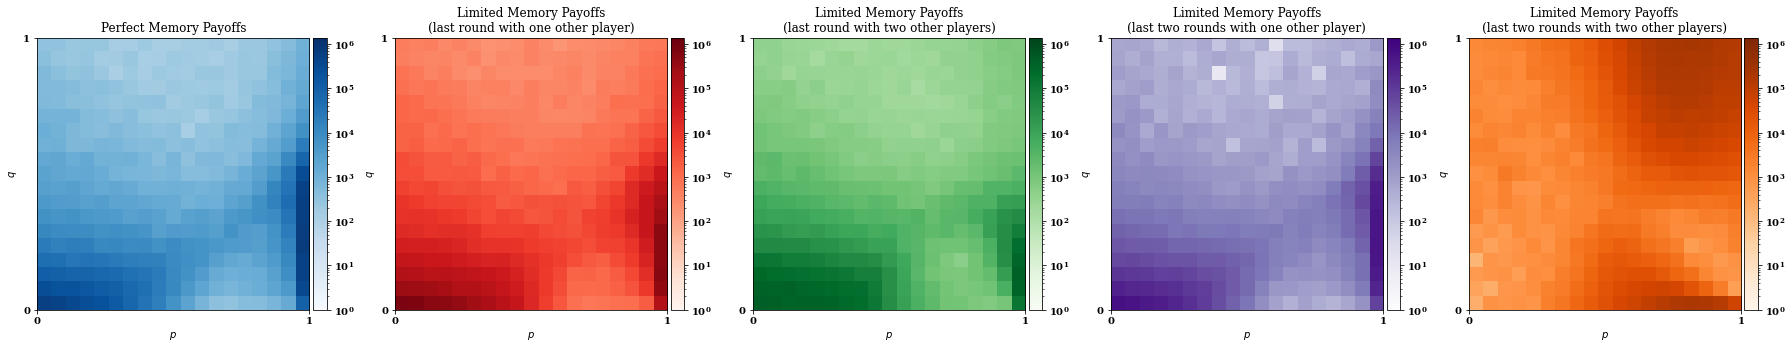

In [63]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower", cmap=cmaps[i],
                     norm=colors.LogNorm(vmin=min_,vmax=max_))

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [54]:
pd.read_csv("../data/clean_sixteen_states_two_rounds.csv")

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
1,0.13486,0.67438,0.930140,0.739040,2.956200,1.0,60.0
2,0.16908,0.97177,0.936260,0.968360,3.873500,61.0,205.0
3,0.26040,0.89113,0.902510,0.890260,3.561100,266.0,117.0
4,0.17737,0.55111,0.076418,0.145230,0.580910,383.0,17.0
...,...,...,...,...,...,...,...
58042,0.96707,0.50187,0.000990,0.003426,0.013702,9999700.0,100.0
58043,0.46978,0.10643,0.658250,0.423340,1.693400,9999800.0,0.0
58044,0.25312,0.62954,0.602480,0.617800,2.471200,9999800.0,100.0
58045,0.33951,0.95999,0.765210,0.947950,3.791800,9999900.0,100.0


**The following is true for: R=,2,; S=,-1,; T=,3,; P=,0,; N=,100,; beta=,1,; nIt=,10000000,**

In [55]:
dfs[-2]

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
1,0.13486,0.67438,0.930140,0.739040,2.956200,1.0,60.0
2,0.16908,0.97177,0.936260,0.968360,3.873500,61.0,205.0
3,0.26040,0.89113,0.902510,0.890260,3.561100,266.0,117.0
4,0.17737,0.55111,0.076418,0.145230,0.580910,383.0,17.0
...,...,...,...,...,...,...,...
58042,0.96707,0.50187,0.000990,0.003426,0.013702,9999700.0,100.0
58043,0.46978,0.10643,0.658250,0.423340,1.693400,9999800.0,0.0
58044,0.25312,0.62954,0.602480,0.617800,2.471200,9999800.0,100.0
58045,0.33951,0.95999,0.765210,0.947950,3.791800,9999900.0,100.0


In [56]:
dfs = [pd.read_csv(file) for file in files]

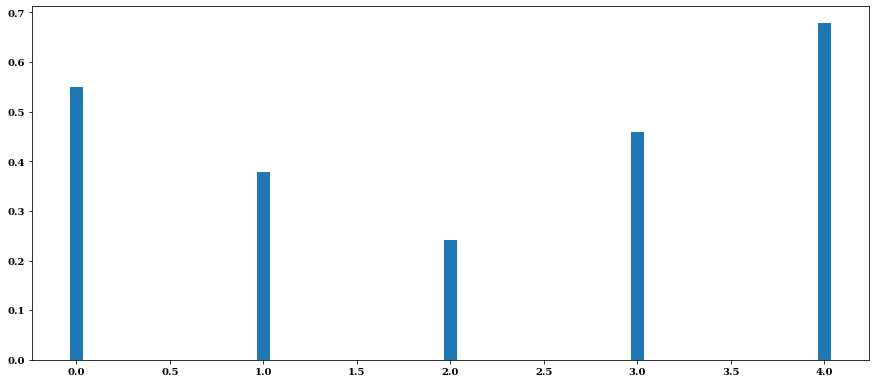

In [57]:
indices = ((i, j) for i in range(2) for j in range(4))

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 20))

for df in dfs:
    for column in [r'$\phi$', '$\phi$ two opponents']:
        piv = pd.pivot_table(df.round(2), values=column, index=["p"], columns=["q"], )
        
        index = indices.__next__()
    

        im = axes[index].imshow(piv, );

        divider = make_axes_locatable(axes[index])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[index].set_title(column)

        axes[index].invert_yaxis()
    plt.tight_layout()

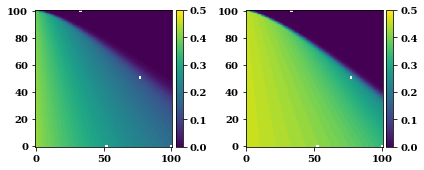

In [142]:
fig, axes = plt.subplots(ncols=2)

for i, column in enumerate(['phi', 'phi two opponents']):
    piv = pd.pivot_table(two_rounds.round(2), values=column, index=["p"], columns=["q"], )

    im = axes[i].imshow(piv, vmax=0.5);
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].invert_yaxis()
plt.tight_layout()

In [119]:
piv = pd.pivot_table(two_rounds.round(2), values="phi two opponents",index=["p"], columns=["q"], )

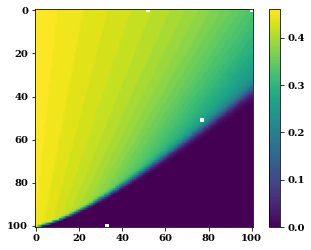

In [120]:
plt.imshow(piv,);

plt.colorbar();

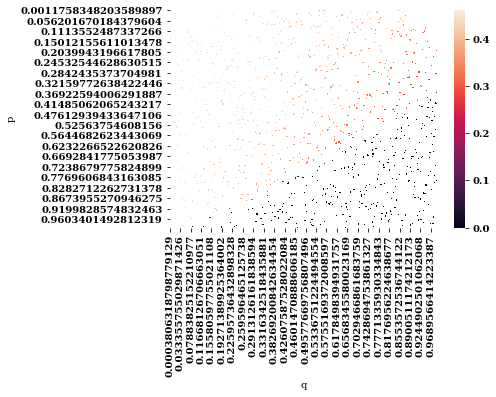

In [47]:
data_pivoted = two_rounds.pivot("p", "q", "phi")

ax = sns.heatmap(data_pivoted)

In [56]:
dfs[1].sort_values('frequencies', ascending=False)

,y,p,q,average cooperation rate,average score,t,frequencies
37500,0.977671,0.996646,0.113590,0.971377,1.942754,7591220,18765
27581,0.510122,0.999880,0.071698,0.991622,1.983244,5543521,16106
2398,0.646690,0.999720,0.081839,0.992377,1.984755,479955,15768
36530,0.140138,0.997111,0.149591,0.975567,1.951133,7365127,14107
47781,0.569040,0.999149,0.088514,0.985805,1.971610,9719325,11883
...,...,...,...,...,...,...,...
19758,0.690840,0.373912,0.533754,0.460394,0.920789,3988311,1
40694,0.637864,0.945439,0.011009,0.174960,0.349920,8273787,1
4229,0.147829,0.607183,0.142279,0.265674,0.531348,883075,1
34500,0.385858,0.894013,0.041912,0.284072,0.568144,6899680,1


In [57]:
dfs[2]

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1416
1,0.616295,0.669364,0.037202,0.102534,0.205068,1416,16
2,0.027399,0.985180,0.539331,0.971551,1.943101,1432,33
3,0.932912,0.096444,0.599107,0.399052,0.798105,1465,6
4,0.537321,0.205008,0.434041,0.353307,0.706613,1471,14
...,...,...,...,...,...,...,...
50523,0.141181,0.993672,0.048724,0.871764,1.743527,9997884,91
50524,0.696240,0.866220,0.667809,0.832936,1.665872,9997975,7
50525,0.123385,0.446948,0.348379,0.386182,0.772363,9997982,11
50526,0.530765,0.274760,0.008265,0.011976,0.023951,9997993,557


**The following is true for: R=,2,; S=,-1,; T=,3,; P=,0,; N=,100,; beta=,1,; nIt=,10000000,**

In [58]:
dfs = [pd.read_csv(file) for file in files]

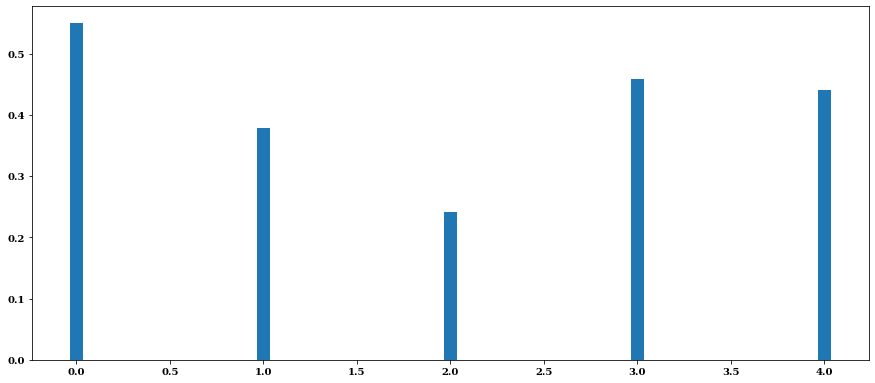

In [59]:
fig, axes = plt.subplots(figsize=(15, 6.5));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)) for df in dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.07);

# axes[i].set_ylabel("cooperation rate", weight="bold", fontsize=12);

# axes[i].set_ylim(0, 1);
# axes[i].set_xticks([0, 0.1, 0.2]);
# axes[i].set_xticklabels([bars[0], bars[1], ""], fontsize=12);